# Midterm Exam (part 2) - Computational Physics I

### Date: Wednesday 17 April 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

## Name: Males Araujo Yorlan

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The exam is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems:

## 6. I/O and regression: damped pendulum (5 points) 

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0,$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$$y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)},$$ 

where $A$ is  the inital oscillation amplitude, $\beta=\frac{b}{2m}$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. 

https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/damped_pendulum.csv

a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

e) Make a plot showing the empirical data and the best-fit model obtained from your regression.



##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator

In [1]:
# a) Function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def io_function(filename):
    """
    Reads in a file and get two arrays: time and deltas.
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ",")

    # Get data into arrays:
    time = np.array(df["time"]) # in units of pages
    deltas = np.array(df["displacement"]) # in units of mm

    return time, deltas

In [3]:
# b) Calling it
file = "./data/damped_pendulum.csv"

t, d = io_function(file)

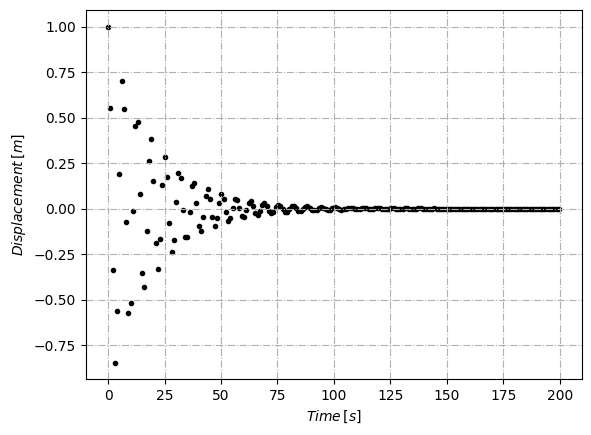

In [8]:
# Plotting
plt.figure()

plt.scatter(t, d, marker=".", color = "k")

plt.xlabel(r"$Time\, [s]$")
plt.ylabel(r"$Displacement\, [m]$")
plt.grid(linestyle = "-.")
plt.show()
plt.close()

In [9]:
# c) Regression:
def fit_model(t_values, A, b,w):
    """
    Function to define model to fut experimental data.
    """
    y_values = A*np.exp(-b*t_values)*np.cos(w*t_values)
    return y_values

# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, t, d)

# Get the regression curve:
fit = fit_model(t, *coef)

In [10]:
coef

array([1.0031306 , 0.05012387, 0.9962379 ])

In [11]:
# d) A, beta and omega are given by the coefficients:

print(f"A ={coef[0]}, beta = {coef[1]}, omega = {coef[2]}.")

A =1.0031306018680461, beta = 0.05012386759729784, omega = 0.9962379022570641.


In [12]:
# Since beta = b/2m where m = 1kg,

print(f"b = {coef[1]*2}")

# and k should be given by

b = 0.10024773519459568


(taking the expression given above)

$$ k = m\left(\omega² + \frac{b²}{4m²}\right)$$

In [13]:
# Then
b = coef[1]*2
print(f'k = {coef[2]**2+(b**2)/4}')

k = 0.9950023599964671


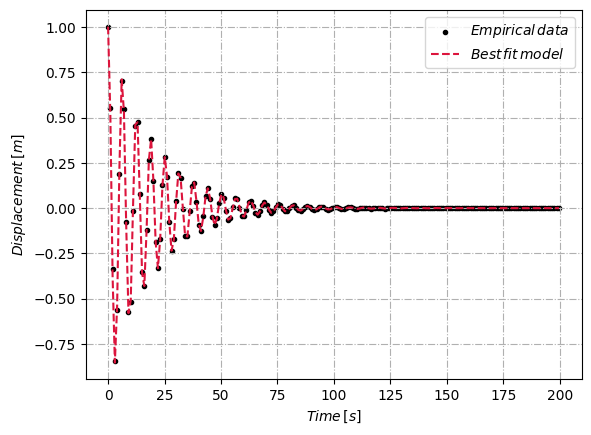

In [14]:
# e) Plotting:
plt.figure()

plt.scatter(t, d, marker=".", color = "k", label = r"$Empirical\, data$")
plt.plot(t, fit, linestyle = "--", color = "crimson",\
        label = r"$Best\, fit\, model$")

plt.xlabel(r"$Time\, [s]$")
plt.ylabel(r"$Displacement\, [m]$")
plt.legend()
plt.grid(linestyle = "-.")
plt.show()
plt.close()

## 7. Image processing: Scanning Electron Microscope of Escherichia coli (5 points)

This problem consists of analysing the reduction of the bacteria Escherichia coli (E. coli) after treatment with Zinc oxide (ZnO) nanoparticles. The images provided below were obtained from a Scanning Electron Microscope (SEM), before and after 5 hours of treatment with ZnO. One pixel of  the image has an area of $0.02^2\mu m^2$.

#### SEM image before ZnO treatment:
https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/bacteria_before.jpg

#### SEM image after ZnO treatment:
https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/bacteria_after.jpg

To analyse how effective this antibacterial treatment is, carry out the following analysis in python:

a) Create a python function that reads in an image file and returns one its channels as an array.

b) Call your function from (a), and:

- Make a 2-panel figure showing the before and after SEM images.
- Make a 2-panel figure showing the before and after pixel histograms of the SEM images.

c) Create a python function that isolates the area covered by the E. coli bacteria from the background. Your function should read in an image channel array and return a cleaned binary image array with zeroes in the background and ones in the E. coli area.

d) Call your function from (c), and:

- Make a 2-panel figure showing the before and after binary images.
- Make a 2-panel figure showing the before and after pixel histograms of the binary images.

e) Using your binary images, calculate the following:

- The total area in pixels and physical units covered by the E. coli bateria before and after treatment.
- The ratio between such areas, how effective is the antibacterial treatment with ZnO nanoparticles?

##### SEM images reference: Zhang et al. 2007, https://link.springer.com/article/10.1007/s11051-006-9150-1

In [15]:
import skimage
import matplotlib.cbook as cbook

In [17]:
# Inspection:
image = cbook.get_sample_data("/home/whyyorlantaken/Documents/Yachay-Tech/Physics/Comp-Phys-I/data/bacteria_before.jpg")
image = plt.imread(image)

print(type(image))

print(image.shape)

<class 'numpy.ndarray'>
(346, 563, 3)


In [18]:
# a) Function:
def channel(filename, layer):
    """
    """
    # Get the image
    image = cbook.get_sample_data(filename)
    image = plt.imread(image)

    # Get an channel
    image_array = image[:, :, layer]

    return image_array

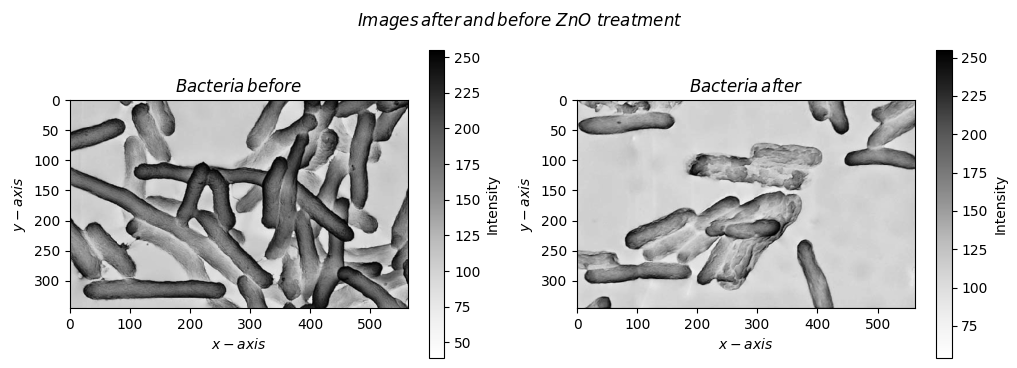

<Figure size 640x480 with 0 Axes>

In [22]:
# b) Call the function:
before = "/home/whyyorlantaken/Documents/Yachay-Tech/Physics/Comp-Phys-I/data/bacteria_before.jpg"
after = "/home/whyyorlantaken/Documents/Yachay-Tech/Physics/Comp-Phys-I/data/bacteria_after.jpg"

image_before = channel(before, 1)
image_after = channel(after, 1)

# Plotting 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle(r"$Images\, after\, and \, before\ ZnO\ treatment$")

ax1.imshow(image_before, cmap = "Greys")
ax1.set_title(r"$Bacteria\, before$")
ax1.set_xlabel(r"$x-axis$")
ax1.set_ylabel(r"$y-axis$")
cb1 = plt.colorbar(ax1.imshow(image_before, cmap = "Greys"))
cb1.set_label("Intensity")

ax2.imshow(image_after, cmap = "Greys")
ax2.set_title(r"$Bacteria\,after$")
ax2.set_xlabel(r"$x-axis$")
ax2.set_ylabel(r"$y-axis$")
cb2 = plt.colorbar(ax2.imshow(image_after, cmap = "Greys"))
cb2.set_label("Intensity")

plt.show()
plt.tight_layout()

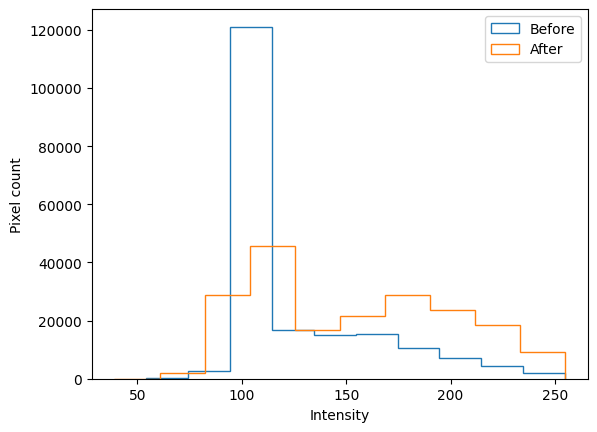

In [23]:
# To do the histograms we need to flatten the arrays:
image_before_1D = np.reshape(image_after, (image_after.size, 1))
image_after_1D = np.reshape(image_before, (image_before.size, 1))                   
                       
plt.figure()
plt.hist(image_before_1D, histtype='step', label='Before')
plt.hist(image_after_1D, histtype='step', label='After')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [24]:
# c) Function to isolate the E.coli:
def cleaner(image):
    """
    Isolates features based on a threshold.
    """
    # We set the threshold:
    threshold = 125
    # And get it in binary format:
    image_cleaned = np.where(image > threshold, 1., 0.)

    return image_cleaned

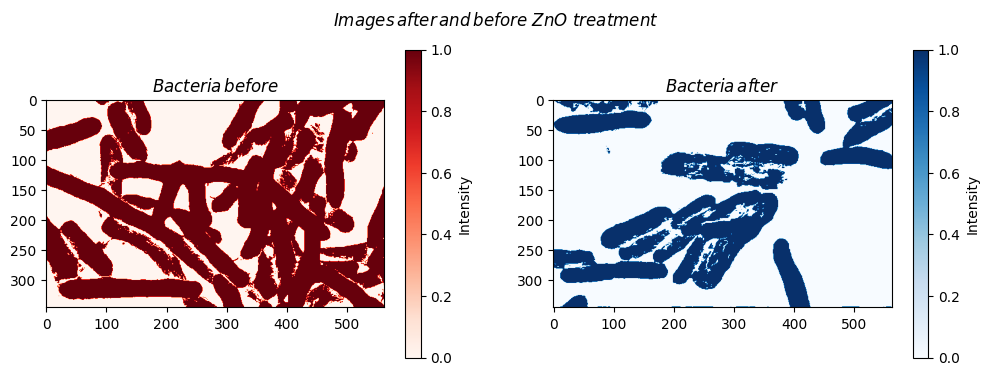

In [25]:
# Call the function:

bin_before = cleaner(image_before)
bin_after = cleaner(image_after)

# Plotting 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle(r"$Images\, after\, and \, before\ ZnO\ treatment$")

Z1 = ax1.imshow(bin_before, cmap = "Reds")
ax1.set_title(r"$Bacteria\, before$")
cb1 = plt.colorbar(Z1)
cb1.set_label("Intensity")

Z2 = ax2.imshow(bin_after, cmap = "Blues")
ax2.set_title(r"$Bacteria\, after$")
cb1 = plt.colorbar(Z2)
cb1.set_label("Intensity")

plt.show()

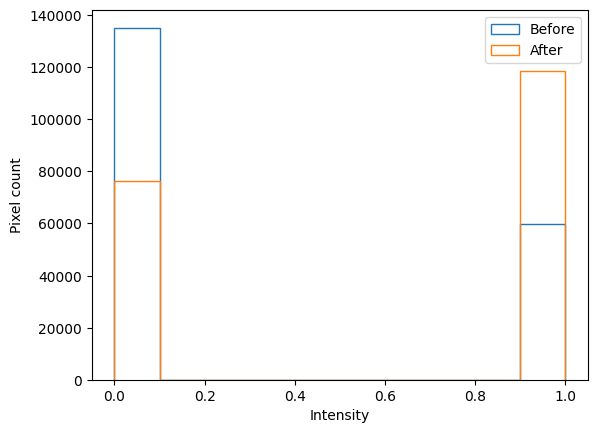

In [26]:
# To do the histograms we need to flatten the arrays:
bin_before_1D = np.reshape(bin_after, (bin_after.size, 1))
bin_after_1D = np.reshape(bin_before, (bin_before.size, 1))                   
                       
plt.figure()
plt.hist(bin_before_1D, histtype='step', label='Before')
plt.hist(bin_after_1D, histtype='step', label='After')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [27]:
# Area:
pixel_area = 0.2**2 # um^2

pixels_before = np.sum(bin_after_1D)
pixels_after = np.sum(bin_before_1D)

print(f"Area in pixels before = {pixels_before},\
area in physical units before = {pixels_before*pixel_area} um^2")
print("\n")
print(f"Area in pixels after = {pixels_after},\
area in physical units after = {pixels_after*pixel_area} um^2")

Area in pixels before = 118358.0,area in physical units before = 4734.320000000001 um^2


Area in pixels after = 59676.0,area in physical units after = 2387.0400000000004 um^2


In [28]:
# Ratio
print(f"Ratio = {pixels_after/pixels_before}")

Ratio = 0.5041991246895013


The treatment reduces the bacteria to its half; it's good but I think it could be better. However, applying it 5 or 6 times will get a good result. 